In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Importing the required python libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from datetime import datetime as dt
from pandas_profiling import ProfileReport
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


# Importing the datasets 
## Both the sales and product dataset were imported and their columns and general distribution were checked.
### The sales table contains variables like product_id(unique) , the price at which the each product id is sold at a specific day(month) and the quantity sold at that specific price. The dataset contains daily data from 2020 January 1 to January 10.
### The product table contains detail about the brand ,the flavour ,the volume per joghurt in grams and the packsize for a specific product id.

In [3]:
#Importing both sales and products dataset
sales = pd.read_csv('/Users/vibin.thottumgal/Documents/buynomics/sales.csv')
product = pd.read_csv('/Users/vibin.thottumgal/Documents/buynomics/product.csv')
sales = sales[[ 'date', 'product_id', 'price', 'units']]
product = product[['brand', 'flavour', 'volume_per_joghurt_g', 'packsize',
       'product_id']]
#product.columns
#sales.columns
#Can do with drop columns 

# Merging both datasets
## Both the sales and product dataset are merged to obtain the final dataset with all the variables which is to be used for Explanatory Data Analysis

### Two new features were added ,the total volume in grams ,which is simply the muliplicative output of volume/joghurt and packsize.Another feature Revenue ,which is the multiplicative output of price and units were also added


In [4]:
#merging the datasets based on product id
df = pd.merge(sales,product,on='product_id',how='left')

#Creating total volume in grams column
df['Total_volume(g)'] = df['volume_per_joghurt_g']*df['packsize']
df['Revenue'] = df['price']*df['units']

# Explanatory Data Analysis

## 1.Feature Statistics 

### The dataset contains 260 rows with 26 different products(brand ,flavour combinations).
### The average price for all the products taken together is 5.3 Euros and average units sold were 1178

In [5]:
#To see the statistics of the the dataset features.
df.describe().round(1)

,product_id,price,units,volume_per_joghurt_g,packsize,Total_volume(g),Revenue
count,260.0,260.0,260.0,260.0,260.0,260.0,260.0
mean,12.9,5.3,1177.5,611.5,4.7,2775.0,5696.6
std,7.8,1.9,401.8,335.3,2.2,2175.7,2079.2
min,0.0,1.5,16.0,150.0,1.0,150.0,141.4
25%,6.0,4.0,944.0,500.0,1.0,900.0,4409.3
50%,13.0,5.1,1275.5,500.0,6.0,3000.0,5747.5
75%,20.0,6.8,1453.2,1000.0,6.0,6000.0,6944.5
max,26.0,9.4,2170.0,1000.0,6.0,6000.0,11475.2


### Value counts of different Brands
### Danone has the highest frequency in the dataset with 48 ,it means some of the flavours of Danone have less than or more than 10 days of data unlike the most of the other flavours
### The same is the case for Actimel and Rewe Brands from frist inspection,

### This is to be deepdived later

In [6]:
df.brand.value_counts()

Danone               48
Mueller              40
Oikos                40
Rewe                 34
Alnatura             30
Activia              20
Ja!                  20
Ecke-Mit-Was-Drin    20
Actimel               8
Name: brand, dtype: int64

### Blueberry is the product with most frequency in the dataset .Might be due to the fact that almost all the brands sell blueberry yogurts or some brand sell multiple version(packsize ,grams) of the same blueberry flavour

In [7]:
df.flavour.value_counts()
#df.product_id.value_counts()
#ProfileReport(df)

blueberry       66
straciatella    60
strawberry      55
chocolate       50
raspberry       29
Name: flavour, dtype: int64

## 2.Deepdive - Brand-Flavour

### a). Danone - As we guessed Danone have 18 entries with the same strawberry flavour offering in the dataset.Since the dataset date frequency is for  a maximum of 10 days ,it means that Danone is selling the same strawberry flavour in different combination. On inspection it is seen that they         sell at a different "PACK SIZE" ,1 and 6 and different volume(grams)
### b). Oikos  - Oikos sells their chocolate flavour in different packsizes and differnt volumes as well.
### c). Some of the other entries have less than 10 entries or 10 days of data (example , Actimel-Blueberry flavour)


In [8]:
#Just to check the number of entries for each product
df.groupby(['brand','flavour','packsize']).size()#.reset_index()

brand              flavour       packsize
Actimel            blueberry     6            8
Activia            blueberry     6           10
                   straciatella  6           10
Alnatura           raspberry     6           10
                   straciatella  6           10
                   strawberry    1           10
Danone             blueberry     1           10
                   chocolate     6           10
                   straciatella  6           10
                   strawberry    1           10
                                 6            8
Ecke-Mit-Was-Drin  raspberry     6           10
                   straciatella  6           10
Ja!                blueberry     6           10
                   straciatella  6           10
Mueller            blueberry     6           10
                   chocolate     6           10
                   straciatella  6           10
                   strawberry    6           10
Oikos              blueberry     1           1

### d). Danone have the cheapest product sold as a single unit in the market with an average price of 1.7 euros for its Strawberry flavour.Interestingly Danone sells its blueberry flavour for twice the price of the strawberry flavour on average. Danone also sells it 6 packs sized strawberry flavour for the highest price compared to other brands at 7.7 euro per pack on average.

### e). Brands like Danone and Mueller sells a lot.

In [9]:
df.groupby(['brand','flavour','packsize']).agg({'price':'mean','units':'mean','Revenue':'mean','Total_volume(g)':'mean'}).sort_values(['price'])

price        units      Revenue  \
brand             flavour      packsize                                       
Danone            strawberry   1         1.728000  1457.100000  2494.190000   
Oikos             strawberry   1         3.327000  1362.100000  4461.682000   
Rewe              chocolate    1         3.386000  1563.800000  5284.238000   
Danone            blueberry    1         3.733000  1344.200000  5025.325000   
Oikos             chocolate    1         3.917000  1431.300000  5560.866000   
Alnatura          straciatella 6         4.019000  1465.900000  5880.908000   
Oikos             blueberry    1         4.259000  1350.800000  5647.063000   
Danone            straciatella 6         4.269000  1502.600000  6341.917000   
                  chocolate    6         4.311000  1545.100000  6504.814000   
Alnatura          strawberry   1         4.583000  1383.900000  6345.995000   
Mueller           blueberry    6         4.602000  1270.100000  5801.402000   
                  strawberry   6         4.658000  1238.100000  5631.036000   
Activia           straciatella 6         5.078000  1234.000000  6112.287000   
Oikos             chocolate    6         5.370000  1337.000000  6982.727000   
Ecke-Mit-Was-Drin straciatella 6         5.570000  1367.500000  7549.843000   
Ja!               straciatella 6         5.590000  1458.000000  8125.514000   
Mueller           straciatella 6         5.998000  1254.600000  7457.956000   
Alnatura          raspberry    6         6.209000  1017.800000  6188.864000   
Ja!               blueberry    6         6.221000   850.300000  5121.966000   
Activia           blueberry    6         6.720000   741.500000  4719.847000   
Mueller           chocolate    6         7.107000  1246.900000  8599.057000   
Ecke-Mit-Was-Drin raspberry    6         7.116000   679.400000  4520.804000   
Rewe              strawberry   6         7.131429   714.428571  4790.231429   
Actimel           blueberry    6         7.392500   729.875000  5015.871250   
Rewe              blueberry    6         7.412500   679.250000  4832.938750   
                  raspberry    6         7.448889   594.000000  4280.767778   
Danone            strawberry   6         7.738750   438.625000  3336.468750   

                                         Total_volume(g)  
brand             flavour      packsize                   
Danone            strawberry   1                   150.0  
Oikos             strawberry   1                   500.0  
Rewe              chocolate    1                   500.0  
Danone            blueberry    1                   500.0  
Oikos             chocolate    1                  1000.0  
Alnatura          straciatella 6                   900.0  
Oikos             blueberry    1                  1000.0  
Danone            straciatella 6                   900.0  
                  chocolate    6                   900.0  
Alnatura          strawberry   1                  1000.0  
Mueller           blueberry    6                   900.0  
                  strawberry   6                   900.0  
Activia           straciatella 6                  3000.0  
Oikos             chocolate    6                  3000.0  
Ecke-Mit-Was-Drin straciatella 6                  3000.0  
Ja!               straciatella 6                  3000.0  
Mueller           straciatella 6                  3000.0  
Alnatura          raspberry    6                  3000.0  
Ja!               blueberry    6                  3000.0  
Activia           blueberry    6                  6000.0  
Mueller           chocolate    6                  6000.0  
Ecke-Mit-Was-Drin raspberry    6                  6000.0  
Rewe              strawberry   6                  6000.0  
Actimel           blueberry    6                  6000.0  
Rewe              blueberry    6                  6000.0  
                  raspberry    6                  6000.0  
Danone            strawberry   6                  6000.0

### f). As guessed Mueller ,Danone and Oikos aremthe top selling brands and top revenue generating brands. Mueller sells comparitively lesser units as that of the other two , but generates the most revenue as the majority of their products have pack size more than 1. 

In [10]:
#Checking the revenue and units sold per brand
df.groupby(['brand']).agg({'Revenue':'sum','units':'sum'}).sort_values(['Revenue'])

,Revenue,units
brand,,
Actimel,40126.97,5839.0
Activia,108321.34,19755.0
Ecke-Mit-Was-Drin,120706.47,20469.0
Ja!,132474.80,23083.0
Rewe,163564.42,31419.0
Alnatura,184157.67,38676.0
Oikos,226523.38,54812.0
Danone,230354.21,61999.0
Mueller,274894.51,50097.0


## 2. Variable interactions

### a). Price and units have an almost linear relationship ,as the general trend is when price goes up ,the units goes down.
### b). Product ids does not have high impact in price ,meaning the same product were sold at different prices at different points of time.
### c). Units and volume per yogurt have an interesting relationship wherein smaller sized yogurts are sold more comparitively.

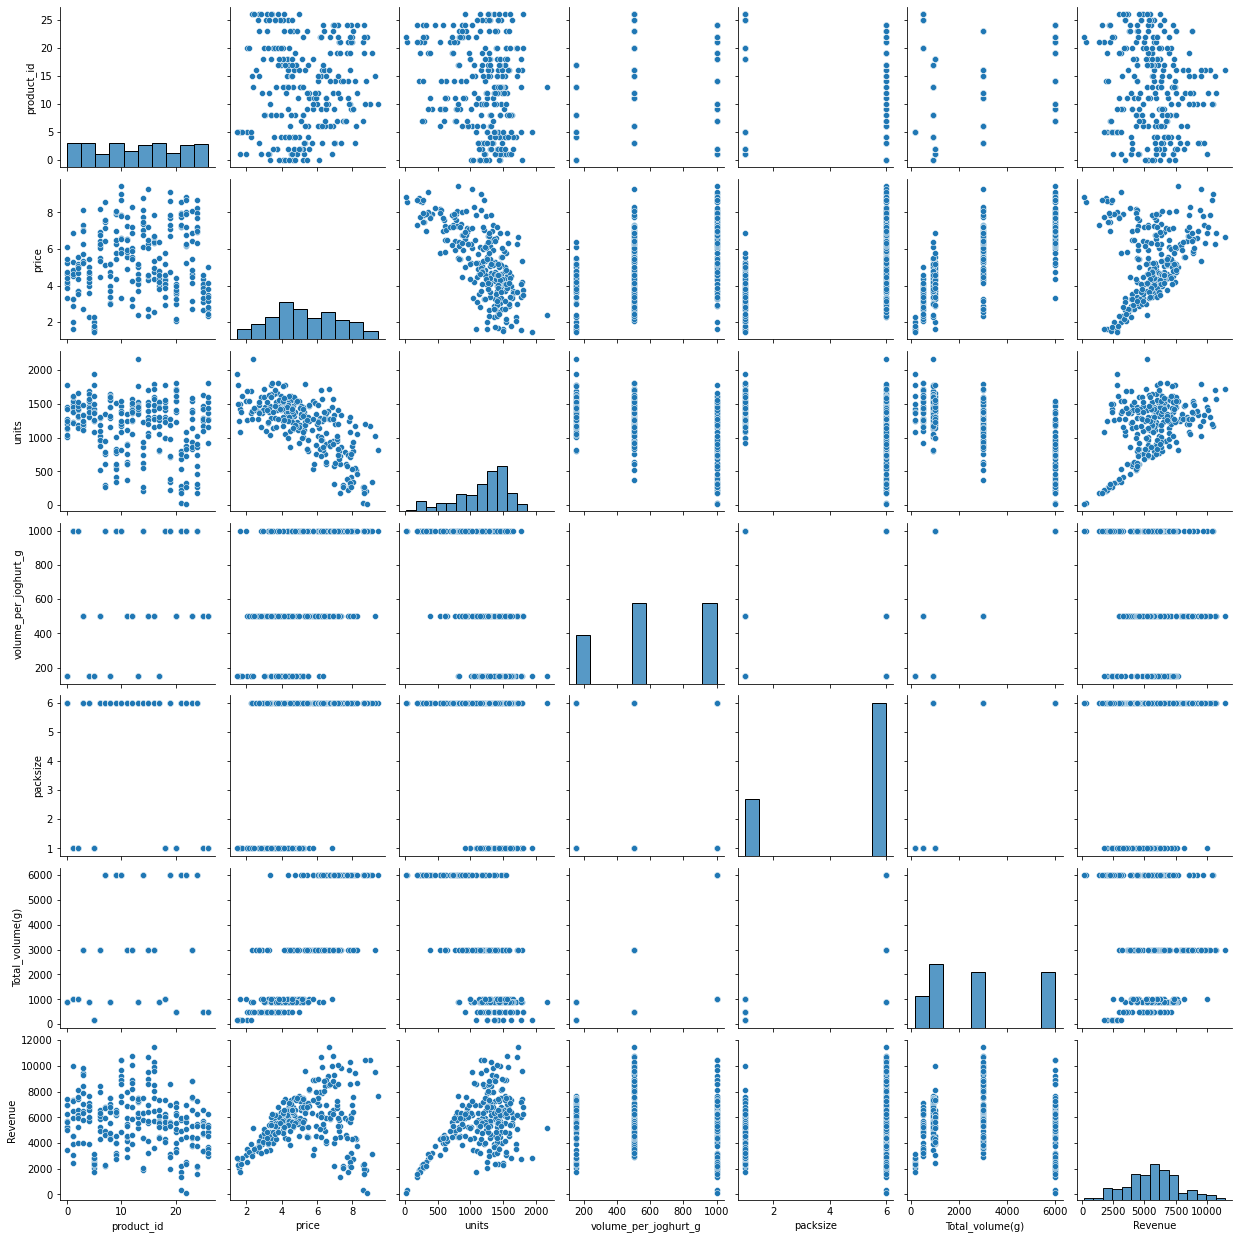

In [11]:
sns.pairplot(df)

<AxesSubplot:>

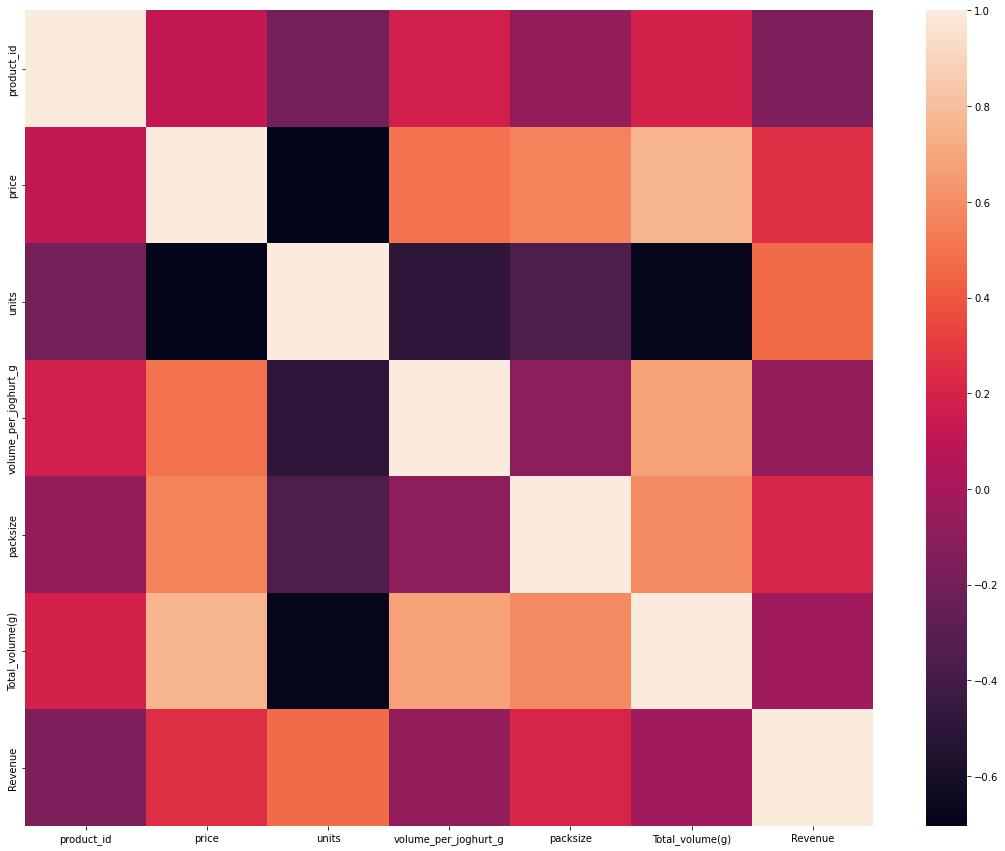

In [12]:
plt.figure(figsize=(19, 15))
sns.heatmap(df.corr())

# Filtering datasets based on unique product ids
## For now we treat the same brand selling the same flavour with different packsize as different products for simplitcity.

In [13]:
#Filtering for product id
product_ids=df.product_id.unique().tolist()

dataset_names = []
#Creating datasets for each product
for i in product_ids:
    globals()[f"df_product_{i}"] = df[df.product_id == i]
    #dataset_names.append(globals()[f"df_product_{i}"])
    

In [14]:
#For getting the dataset names
df_names = ['df_product_' + str(s) for s in product_ids]
#Storing the dataframes in a new variable 
df_products = [eval(x) for x in df_names]


# Creating models for each product id ,with a dataframe showing their elasticity ,name and other relevant factors.

## A model taking all products together will be added at last just to see the elasticity as a whole.
## Elasticity in this case will be measured as -- (Slope of the linear predicted line)*(average_price/average_quantity)


In [15]:
#Importing statmodels library to declare the OLS regression function
import statsmodels.api as sm

#Creating variables inside a dictionary to create a final datafram at last with details about all the products.
results_values = {
    "Product_Name": [],
    "price_elasticity": [],
    "price_average": [],
    "quantity_average": [],
    "revenue_average" : [],
    "intercept": [],
    "t_score":[],
    "slope": [],
    "coefficient_pvalue" : [],
    "r_squared" : []}

for i in df_products:
    #Taking the dataframes for each product one by one from the df_products variable
    df_regression = i
    x = df_regression['price']
    y = df_regression['units']
    X = sm.add_constant(x)
    model = sm.OLS(y, X)
    result = model.fit()

    #We can put a p-value threshold for cutting of results below a certain threshold.For now since the dataset is small
    # we are not taking this. Eg:if the p-value of results are less than 0.05 or 5% the results are 95% significant.
    # if result.f_pvalue <  0.05:
    rsquared = result.rsquared
    coefficient_pvalue = result.f_pvalue
    intercept, slope = result.params
    average_price = df_regression.price.mean()
    average_quantity = df_regression.units.mean()
    average_revenue = df_regression.Revenue.mean()
    tintercept, t_score = result.tvalues

    #Price elasticity Formula ,Here we are taking mean price as we are taking the regressor line as a whole
    price_elasticity = (slope)*(average_price/average_quantity)   


    #Appending results into dictionary for dataframe
    results_values["Product_Name"].append(df_regression.brand.unique()[0] + '_'+df_regression.flavour.unique()[0])
    results_values["price_elasticity"].append(price_elasticity)
    results_values["price_average"].append(average_price)
    results_values["quantity_average"].append(average_quantity)
    results_values["revenue_average"].append(average_revenue)
    results_values["intercept"].append(intercept)
    results_values['t_score'].append(t_score)
    results_values["slope"].append(slope)
    results_values["coefficient_pvalue"].append(coefficient_pvalue)
    results_values["r_squared"].append(rsquared)

#Now re-doing the same analyis taking all the products together as from the pair-plot we saw an almost linear relationship between price and quantity.
x = df['price']
y = df['units']
X = sm.add_constant(x)
model = sm.OLS(y, X)
result = model.fit()

rsquared = result.rsquared
coefficient_pvalue = result.f_pvalue
intercept, slope = result.params
average_price = df.price.mean()
average_quantity = df.units.mean()
average_revenue = df.Revenue.mean()
tintercept, t_score = result.tvalues

price_elasticity = (slope)*(average_price/average_quantity) 

results_values["Product_Name"].append('All_Products')
results_values["price_elasticity"].append(price_elasticity)
results_values["price_average"].append(average_price)
results_values["quantity_average"].append(average_quantity)
results_values["revenue_average"].append(average_revenue)
results_values["intercept"].append(intercept)
results_values['t_score'].append(t_score)
results_values["slope"].append(slope)
results_values["coefficient_pvalue"].append(coefficient_pvalue)
results_values["r_squared"].append(rsquared)

In [16]:
final_df = pd.DataFrame.from_dict(results_values)

In [17]:
final_df.sort_values(['Product_Name'],inplace=True)
final_df = pd.concat([final_df[final_df.Product_Name == "All_Products"], final_df[final_df.Product_Name != "All_Products"]],ignore_index=True)


In [18]:
def format_color_groups(values):
    if values < -1:
        return  'background-color : yellow;border-collapse: collapse; border: 1px solid black;'
    elif ((values <= 1) & (values >=-1)):
        return  'background-color : lightgreen;border-collapse: collapse; border: 1px solid black;'
    else:
        return  'background-color : lightblue;border-collapse: collapse; border: 1px solid black;'

final_df = final_df.style.applymap(format_color_groups,subset=['price_elasticity'])
#now df is styler so no need to add style
final_df = final_df.set_table_attributes('style="border-collapse: collapse; border: 1px solid black;"')


# Final DataFrame subjected for interpretation.

In [19]:
final_df

,Product_Name,price_elasticity,price_average,quantity_average,revenue_average,intercept,t_score,slope,coefficient_pvalue,r_squared
0,All_Products,-0.675756,5.288538,1177.496154,5696.629885,1973.196287,-15.949642,-150.457473,0.000000,0.496478
1,Actimel_blueberry,-2.476234,7.392500,729.875000,5015.871250,2537.216624,-3.574711,-244.483142,0.011717,0.680487
2,Activia_blueberry,-1.627362,6.720000,741.500000,4719.847000,1948.188713,-2.617753,-179.566773,0.030758,0.461375
3,Activia_straciatella,-0.256331,5.078000,1234.000000,6112.287000,1550.312339,-1.133819,-62.290732,0.289702,0.138446
4,Alnatura_raspberry,-0.871016,6.209000,1017.800000,6188.864000,1904.319613,-2.297904,-142.779773,0.050636,0.397607
5,Alnatura_straciatella,-0.045319,4.019000,1465.900000,5880.908000,1532.332777,-0.244004,-16.529678,0.813369,0.007387
6,Alnatura_strawberry,0.025723,4.583000,1383.900000,6345.995000,1348.301461,0.100580,7.767519,0.922359,0.001263
7,Danone_blueberry,0.066753,3.733000,1344.200000,5025.325000,1254.471034,0.253155,24.036691,0.806533,0.007947
8,Danone_chocolate,-0.702318,4.311000,1545.100000,6504.814000,2630.251886,-4.506907,-251.716977,0.001984,0.717436
9,Danone_straciatella,-0.303310,4.269000,1502.600000,6341.917000,1958.353619,-3.547457,-106.758871,0.007537,0.611357
